<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/Built-in_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)

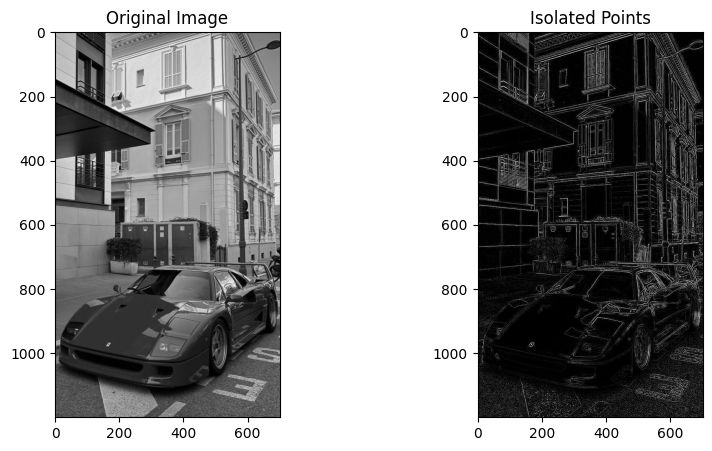

In [3]:
# Define the Laplacian kernel
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

# Apply the filter to detect isolated points
isolated_points = cv2.filter2D(image, -1, laplacian_kernel)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(isolated_points, cmap='gray'), plt.title('Isolated Points')
plt.show()

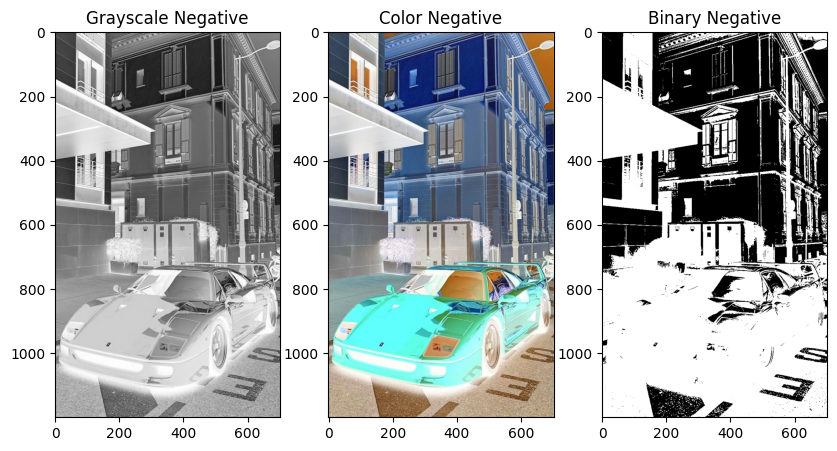

In [4]:
# Load images in grayscale, color, and binary format
gray_image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread('/content/F40.jpg', cv2.IMREAD_COLOR)
binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)[1]

# Compute negatives
gray_negative = 255 - gray_image
color_negative = 255 - color_image
binary_negative = 255 - binary_image

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(gray_negative, cmap='gray'), plt.title('Grayscale Negative')
plt.subplot(1,3,2), plt.imshow(color_negative[:,:,::-1]), plt.title('Color Negative')
plt.subplot(1,3,3), plt.imshow(binary_negative, cmap='gray'), plt.title('Binary Negative')
plt.show()

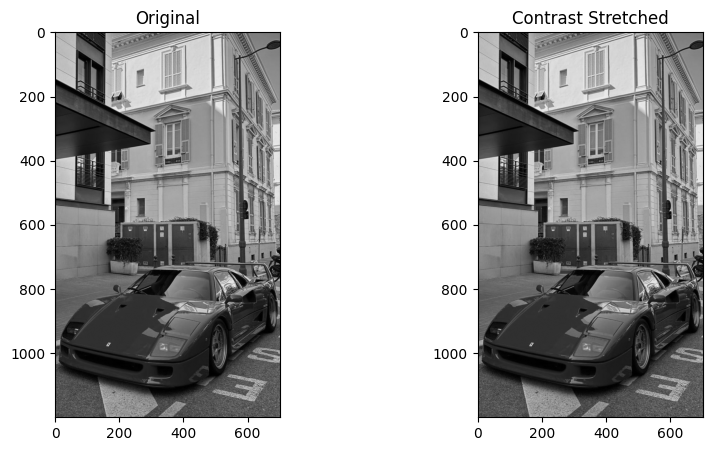

In [6]:
def contrast_stretch(image):
    min_val, max_val = np.min(image), np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)

# Load grayscale image
gray_image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)

# Apply contrast stretching
stretched_image = contrast_stretch(gray_image)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray_image, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(stretched_image, cmap='gray'), plt.title('Contrast Stretched')
plt.show()

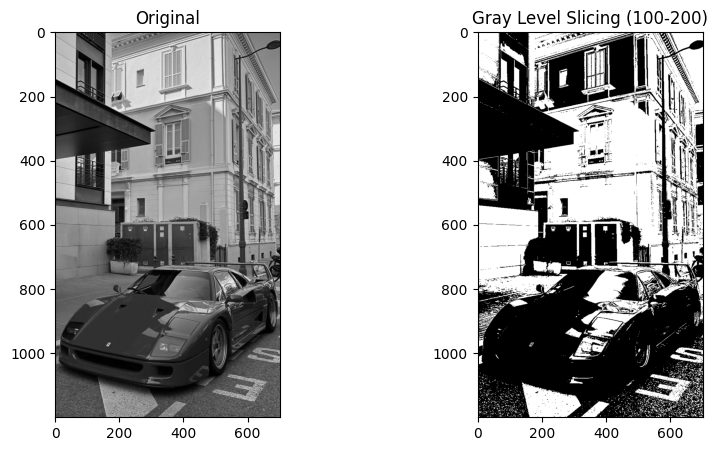

In [7]:
def gray_level_slicing(image, lower, upper):
    sliced = np.where((image >= lower) & (image <= upper), 255, 0)
    return sliced.astype(np.uint8)

# Load grayscale image
gray_image = cv2.imread('/content/F40.jpg', cv2.IMREAD_GRAYSCALE)

# Apply gray level slicing
sliced_image = gray_level_slicing(gray_image, 100, 200)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray_image, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(sliced_image, cmap='gray'), plt.title('Gray Level Slicing (100-200)')
plt.show()


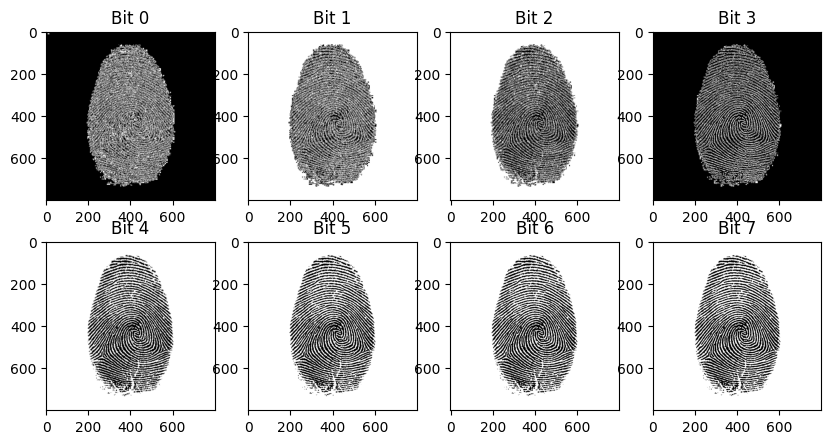

In [8]:
def bit_plane_slicing(image, bit):
    return ((image >> bit) & 1) * 255  # Extract specific bit

# Load fingerprint image
fingerprint_image = cv2.imread('/content/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA0L2pvYjY3My0wNjktdi5qcGc.jpg.webp', cv2.IMREAD_GRAYSCALE)

# Extract bit planes
bit_planes = [bit_plane_slicing(fingerprint_image, i) for i in range(8)]

# Display bit planes
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(bit_planes[i], cmap='gray'), plt.title(f'Bit {i}')
plt.show()


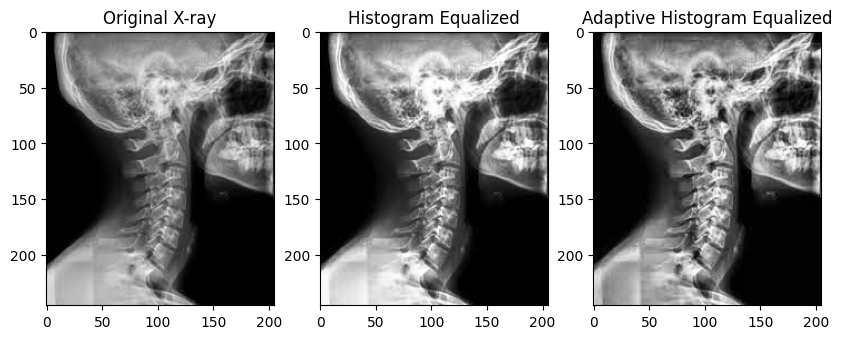

In [9]:
# Load X-ray image
xray_image = cv2.imread('/content/Unknown.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
hist_eq = cv2.equalizeHist(xray_image)

# Apply adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
adaptive_hist_eq = clahe.apply(xray_image)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(xray_image, cmap='gray'), plt.title('Original X-ray')
plt.subplot(1,3,2), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Equalized')
plt.subplot(1,3,3), plt.imshow(adaptive_hist_eq, cmap='gray'), plt.title('Adaptive Histogram Equalized')
plt.show()




---

## **1. Detecting Isolated Points in an Image (Point Operation / Gray Level Transformation)**
### **Concept:**
- Isolated points (small bright or dark spots) in an image can be caused by noise or defects.
- A **Laplacian filter** detects sudden changes in intensity by computing the difference between a pixel and its neighbors.
- The Laplacian kernel we use highlights points with sharp intensity differences.

🔹 **Formula Used:**  
\[
I_{\text{filtered}} = I * K
\]
where \( I \) is the image and \( K \) is the Laplacian kernel.

---

## **2. Image Negative (Reversing Pixel Order)**
### **Concept:**
- The negative of an image is obtained by inverting pixel values.
- It helps in **enhancing bright areas in dark images** and vice versa.
- Each pixel \( P \) is transformed using:
  
🔹 **Formula Used:**  
\[
I_{\text{negative}} = 255 - P
\]

**Types of Images Handled:**
1. **Grayscale:** Direct pixel inversion.
2. **Color Image:** Apply inversion to each channel (R, G, B).
3. **Binary Image:** Flip black and white (0 becomes 255, and 255 becomes 0).

---

## **3. Contrast Stretching vs. Histogram Equalization (Spatial Domain)**
### **Concept:**
- **Contrast stretching** improves visibility by **scaling intensity values** between a defined range.
- Unlike **histogram equalization**, it does **not force a uniform pixel distribution**.
  
🔹 **Formula Used (Min-Max Normalization):**  
\[
I_{\text{stretched}} = \frac{(I - I_{\text{min}}) \times 255}{I_{\text{max}} - I_{\text{min}}}
\]

✍ **Key Difference:**
| Feature | Contrast Stretching | Histogram Equalization |
|---------|--------------------|-----------------------|
| Changes pixel values? | Yes, scales to a new range | Yes, redistributes intensity |
| Maintains original contrast? | Yes, just scales | No, modifies pixel distribution |
| Best for | Low contrast images | Unevenly exposed images |

---

## **4. Gray Level Slicing**
### **Concept:**
- This method **highlights a specific range of intensity values** in an image.
- Useful in medical imaging (e.g., focusing on tumors) or satellite images (highlighting land/water).

🔹 **Two Types:**
1. **Without background preservation:** All non-selected pixels become black.
2. **With background preservation:** Other intensities remain unchanged.

🔹 **Formula Used:**  
If pixel value \( P \) is between a selected range \([L, U]\):  
\[
I_{\text{sliced}} = 255 \quad \text{(white)}
\]
Otherwise,  
\[
I_{\text{sliced}} = 0 \quad \text{(black)}
\]

---

## **5. Bit Plane Slicing**
### **Concept:**
- Every pixel in an 8-bit grayscale image is made up of **8 bits** (binary form).
- **Lower bits (0-3):** Contain less information (can be removed for compression).
- **Higher bits (4-7):** Carry most of the image details.

🔹 **Why Use Bit Plane Slicing?**
- Extracting **higher bits** enhances edges and patterns.
- Helps in **fingerprint and forensic image analysis**.

🔹 **Example for Pixel \( P = 150 \) in Binary:**
```
150 = 10010110 (Bit 7 is most important, Bit 0 is least important)
```

✍ **Observation:**
- Keeping **only higher-order bits (bit 6 & 7)** retains most of the visual information.

---

## **6. Histogram Equalization & Adaptive Histogram Equalization for X-ray Images**
### **Concept:**
- **Histogram Equalization (HE):**  
  - Adjusts contrast by **spreading pixel values** over the entire range.
  - Makes darker areas brighter and bright areas darker.
  - Works best for images with **uneven brightness**.

- **Adaptive Histogram Equalization (AHE):**  
  - Unlike normal HE, it applies contrast adjustment **locally**.
  - Prevents **over-enhancement** in already bright areas.
  - Best for **medical X-ray images**.

🔹 **Formula Used (HE Transformation Function):**
\[
T(r) = \frac{\sum_{i=0}^{r} P(i) \times (L-1)}{N}
\]
where:
- \( T(r) \) is the new intensity value.
- \( P(i) \) is the probability of intensity \( i \).
- \( L \) is the total number of intensity levels.
- \( N \) is the total number of pixels.

---

### **Final Thoughts:**
Each of these enhancement techniques plays a unique role in improving image quality, whether it’s for noise reduction, contrast adjustment, or feature extraction. If you need a deeper explanation of any concept, let me know! 😊